# Linear Classification Lab

## 准备工作
### 环境准备
请确保完成以下依赖包的安装，并且通过下面代码来导入与验证。

In [3]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

### 数据集准备

我们将使用以下二维数据集来进行线性分类器的拟合。

请执行下面的代码以加载数据集并对其进行可视化。

In [4]:
from data_generator import gen_2D_dataset

x_train, y_train = gen_2D_dataset(100)
x_test, y_test = gen_2D_dataset(10) 

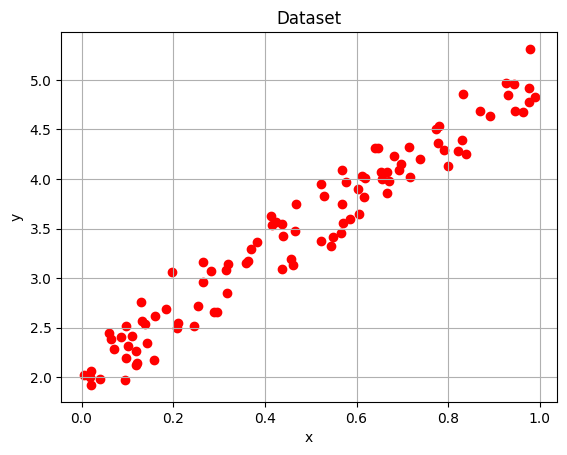

In [5]:
from vis_util import visualize_2D_dataset, visualize_2D_border

visualize_2D_dataset(x_train, y_train)

## 线性回归 (10 pts)

在这一部分，你需要通过最小二乘法的闭式解来解决线性回归问题，并计算以下损失函数的值。

$$ L(w,b) = \frac{1}{n} \sum_{i\in[n]} (y_i - (w^Tx_i + b))^2 $$

你可能会用到的函数有：`numpy.linalg.inv()`、`numpy.dot()`、`numpy.transpose()`、`numpy.ones()`、`numpy.concatenate()`、`numpy.sum()` 等。

In [6]:
# In this section, please implement the linear regression using the closed form solution 

# TODO: firstly, add a column of 1s to the x_train as the bias term

x_train_new = x_train.reshape(-1,1)
y_train_new = y_train.reshape(-1,1)

num_rows, num_cols = x_train_new.shape

ones_col = np.ones((num_rows, 1))

x_train_new = np.concatenate((x_train_new, ones_col), axis=1)

# TODO: secondly, use the closed form solution to calculate the best theta

theta = np.linalg.inv((x_train_new.T).dot(x_train_new)).dot(x_train_new.T).dot(y_train_new)


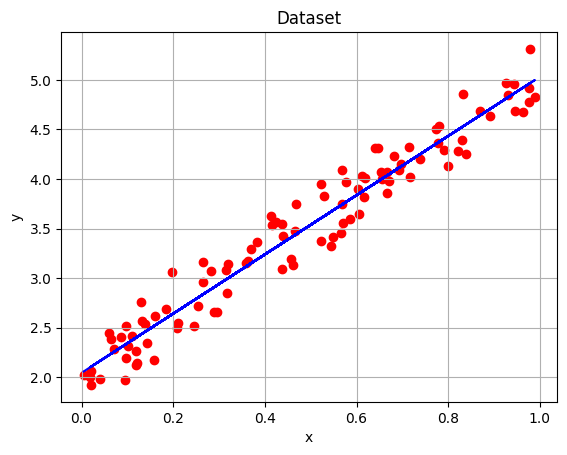

In [7]:
# In this section, please visualize the linear regression solution in 2D using the visualize_2D_border function

# TODO: firstly, compute the y_pred using the best theta

y_pred = x_train_new.dot(theta)

# TODO: Secondly, visualize the linear regression solution in 2D using the visualize_2D_border function

y_pred = y_pred.ravel()

visualize_2D_border(x_train, y_train, y_pred)

In [23]:
# Define the loss function
def compute_loss(X, y, theta):
    ''' 
    Compute the loss function for linear regression

    Args:
        X: the input data
        y: the label
        theta: the weights
    Returns:
        the loss value (a scalar)
    '''
    # TODO: firstly, compute the length of the dataset
    
    n = len(y)
    
    # TODO: secondly, compute the y_pred using the input data and the weights
    
    y_pred = np.dot(X ,theta)

    y_pred = y_pred.ravel()

    # TODO: thirdly, compute the loss using the y_pred and the label
    
    loss = 1/n * np.sum((y_pred-y)**2)

    return loss


In [24]:
# In this section, compute the loss on the training set and the test set

# TODO: the loss on the training set (invoke the compute_loss function)

train_loss = compute_loss(x_train_new, y_train, theta)

# TODO: the loss on the testing test

x_test_new = x_test.reshape(-1,1)

num_rows, num_cols = x_test_new.shape

ones_col = np.ones((num_rows, 1))

x_test_new = np.concatenate((x_test_new, ones_col), axis=1)

test_loss = compute_loss(x_test_new, y_test, theta)

# TODO: print the training loss and the test loss
print(f'Training loss: {train_loss}')
print(f'Test loss: {test_loss}')

Training loss: 0.03969754594898594
Test loss: 0.03129210600605733
